In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.image import imread
from warnings import filterwarnings

In [2]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
filterwarnings('ignore')

In [3]:
class Kmeans:
    '''Implementing Kmeans algorithm.'''
    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

In [4]:
def initializ_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

In [5]:
 def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

In [6]:
def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

In [7]:
def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

In [8]:
def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))

In [9]:
def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

In [10]:
def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [12]:
from google.colab import files
uploaded = files.upload()

Saving DoS ICMP Flood.csv to DoS ICMP Flood.csv


In [13]:
import pandas as pd

df = pd.read_csv('DoS ICMP Flood.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Name,Label
0,192.168.137.174-52.33.155.26-46488-443-6,192.168.137.174,46488,52.33.155.26,443,6,01/09/2023 01:35:31 PM,1415686,43,25,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,DoS ICMP Flood,1
1,192.168.137.250-34.122.121.32-53298-80-6,192.168.137.250,53298,34.122.121.32,80,6,01/09/2023 01:36:14 PM,997485,5,4,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,DoS ICMP Flood,1
2,192.168.137.174-35.224.21.224-51040-443-6,192.168.137.174,51040,35.224.21.224,443,6,01/09/2023 01:36:48 PM,327907,15,0,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,DoS ICMP Flood,1
3,192.168.137.174-35.224.21.224-51040-443-6,192.168.137.174,51040,35.224.21.224,443,6,01/09/2023 01:36:49 PM,0,2,0,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,DoS ICMP Flood,1
4,192.168.137.174-34.173.20.6-35812-443-6,192.168.137.174,35812,34.173.20.6,443,6,01/09/2023 01:35:23 PM,86263581,14,11,...,800863.333333,32909.618586,868018.0,786479.0,1.345368e+07,1.862604e+06,14277971.0,9657926.0,DoS ICMP Flood,1


In [14]:
df = df[['Flow Duration', 'Total Length of Fwd Packet']]
df

,Flow Duration,Total Length of Fwd Packet
0,1415686,45159.0
1,997485,87.0
2,327907,5429.0
3,0,0.0
4,86263581,600.0
...,...,...
2102,119992022,600.0
2103,119995824,599.0
2104,119991957,424.0
2105,110033626,178.0


In [15]:
df.head()

,Flow Duration,Total Length of Fwd Packet
0,1415686,45159.0
1,997485,87.0
2,327907,5429.0
3,0,0.0
4,86263581,600.0


In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.67819272, -0.02215795],
       [-1.68754556, -0.07515705],
       [-1.70252029, -0.06887551],
       ...,
       [ 0.97369919, -0.07476078],
       [ 0.75098669, -0.07505004],
       [ 0.75096184, -0.07504886]])

In [20]:
sse = []
list_k = list(range(1, 10))
list_data = np.array(df.values.tolist())

In [21]:
for k in list_k:
    km = KMeans(n_clusters=k, max_iter=100)
    km.fit(list_data)
    sse.append(km.inertia_)

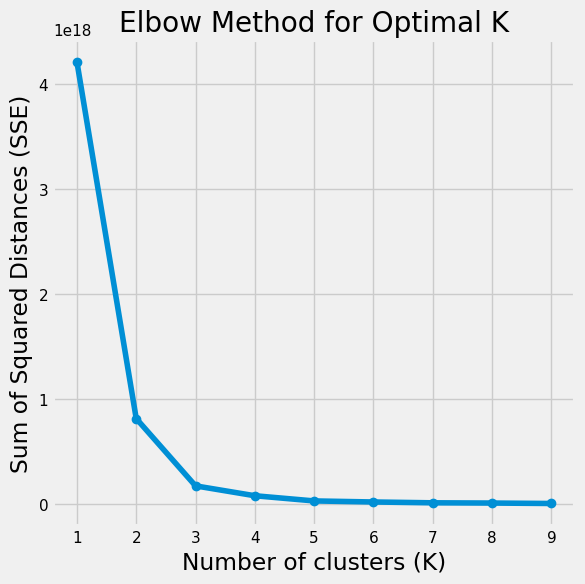

In [22]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [26]:
km = KMeans(n_clusters=5, max_iter=200, random_state=42, n_init=10)
km.fit(df_scaled)

KMeans(max_iter=200, n_clusters=5, n_init=10, random_state=42)

In [27]:
centroids = km.cluster_centers_
centroids

array([[ 0.82775334, -0.07224373],
       [-1.56619567, -0.06931717],
       [ 0.96635123, 15.30212918],
       [-0.41141238, -0.07420571],
       [ 0.09662793,  7.13379004]])

In [28]:
labels = km.labels_
labels

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 3, 3, 3,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1,
       1, 0, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       3, 3, 3, 1, 0, 3, 1, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1,

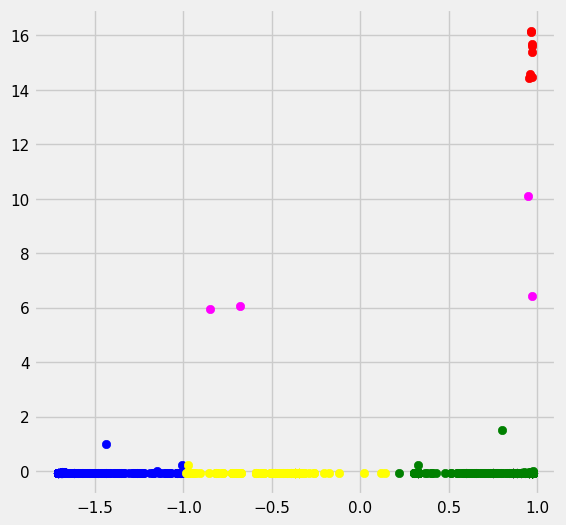

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['green', 'blue', 'red', 'yellow', 'magenta']
for i in range(5):
    plt.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1],
                c=colors[i], label=f'cluster {i+1}')

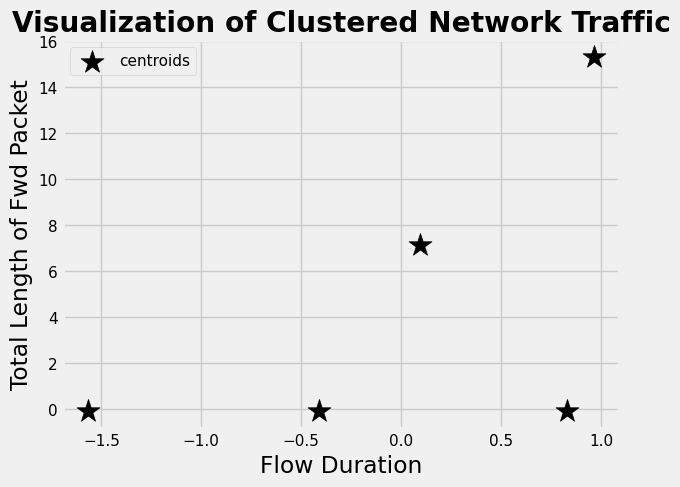

In [31]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='centroids')
plt.xlabel('Flow Duration')
plt.ylabel('Total Length of Fwd Packet')
plt.title('Visualization of Clustered Network Traffic', fontweight='bold')
plt.legend()
ax.set_aspect('equal')
plt.grid(True)
plt.show()